# HANDWRITTEN DIGITS
This is a classifier for handwritten digits from 0 to 9. It has 64 input features.

Importing the libraries to be used.

In [3]:
import matplotlib.pyplot as plt #plotting
import numpy as np #storing and manipulating data in arrays for this case
from sklearn.model_selection import KFold #check for overfitting
from sklearn.neighbors import KNeighborsClassifier #classification model to be used 
from sklearn.metrics import accuracy_score,confusion_matrix #assessing the accuracy of the model.
import pandas as pd #loading from and saving to csv files
 
%matplotlib inline


First I'll load the data from the csv file. The first column just indexes the rows it does not contain actual features so I'll drop it. x is an array made up of the inputs.

In [4]:
df=pd.read_csv("C:/Users/Sylvia/Desktop/comp improvement/data science/Challenge1_HowCrispCanYouClassify-master/data/digits_train.csv")
df=df.drop(df.columns[[0]],axis = 1)
x= df.values[:,0:64]
y = df.values[:,64]

First I'd like a view of the data. Since it is an image I'll assume these are pixel data made up of an 8 by 8 square matrix. I'll check 2 numbers.

6 0


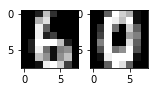

In [5]:
x0 = np.reshape (x[0], (-1,8))
plt.subplot(251)
plt.imshow(x0,cmap=plt.get_cmap('gray'))


x36 = np.reshape (x[36], (-1,8))
plt.subplot(252)
plt.imshow(x36,cmap=plt.get_cmap('gray'))

print(df.get_value(0,"labels"),df.get_value(36,"labels"))#confirmation of the actual y values 


They do look like the numbers 6 and 0 (But with really poor graphics.)

I'll get the mean of 0 to 9 and then the mean of all the numbers

mean of each number

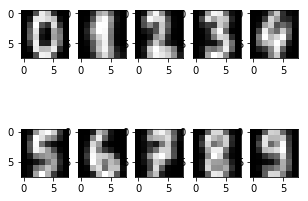

In [6]:

array=[]
sub = 1
col=0

for i in range (0,10):
    array.append(df.loc[df['labels']==i].values[:,0:64])
for i in array:
   
    mean = np.mean(i,axis = 0)
    
    mean = np.reshape (mean, (-1,8))
    
    if (sub>5):
        sub=1
        col=1
    
        
    plt.subplot2grid((2,6),(col,sub))
    plt.imshow(mean,cmap=plt.get_cmap('gray'))
    sub+=1
    

    
    

mean of all numbers

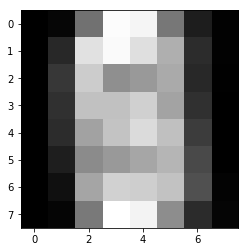

In [7]:
totalmean = np.mean(x,axis = 0)
totalmean = np.reshape (totalmean, (-1,8))

plt.imshow(totalmean,cmap=plt.get_cmap('gray'))

It just looks like a smudge but it does give some insightful information. It seems that according to the data there is no writing (for all the numbers) on the very left and very right.The columns indexed 0 and 8 seem to be simply for padding and don't add any weight to the hypotheses. Most writings are concentrated towards the center. Most numbers tend to have 'parts of them' at the middle top and middle bottom; in fact confirming it from the previous graph confirms this is true for all numbers.


In [8]:
totalmean 

array([[  0.00000000e+00,   2.90000000e-01,   5.39275000e+00,
          1.18657500e+01,   1.15687500e+01,   5.63025000e+00,
          1.36900000e+00,   1.32750000e-01],
       [  3.25000000e-03,   1.95625000e+00,   1.06055000e+01,
          1.17972500e+01,   1.05385000e+01,   8.27425000e+00,
          2.07100000e+00,   1.39000000e-01],
       [  4.75000000e-03,   2.62100000e+00,   9.63200000e+00,
          6.73325000e+00,   7.21725000e+00,   8.00700000e+00,
          1.90750000e+00,   4.77500000e-02],
       [  1.25000000e-03,   2.33450000e+00,   9.11700000e+00,
          9.09350000e+00,   9.80075000e+00,   7.75975000e+00,
          2.31925000e+00,   3.50000000e-03],
       [  7.50000000e-04,   2.09075000e+00,   7.64825000e+00,
          9.25725000e+00,   1.03252500e+01,   9.04975000e+00,
          2.91700000e+00,   0.00000000e+00],
       [  2.40000000e-02,   1.44000000e+00,   6.56200000e+00,
          7.22775000e+00,   7.85575000e+00,   8.53350000e+00,
          3.48875000e+00,   2.2

From above it can be seen that it true that on the utmost left and right for all numbers the value is 0

Now I'm going to create the model for classification. I will be using k nearest neighbours. I will use 5 neighbours because on iterating between 2 to 20 it better than all of them. I would also like to ensure that my data isn't overfitting so I'll do a k-fold validation first. I'll use 10 k-folds cause it seems to be the conventional one.

In [9]:
neigh = KNeighborsClassifier(n_neighbors=4)
kf = KFold(n_splits = 10 ,random_state = None, shuffle = False)
for train_indices,test_indices in kf.split(x):
    X_Train, X_Test =x[train_indices],x[test_indices]
    Y_Train, Y_Test = y[train_indices],y[test_indices]
    neigh.fit(X_Train,Y_Train)
    y_pred = neigh.predict(X_Test)
    print(accuracy_score(Y_Test,y_pred))
   

0.9875
0.995
0.9825
0.985
0.9725
0.9875
0.985
0.98
0.9825
0.9875


It is clear that the model isn't overfitting so I will go and use it to predict the test data

In [10]:
neighAll = KNeighborsClassifier(n_neighbors=5)
neighAll.fit(x,y)
y_predAll = neighAll.predict(x)
print(accuracy_score(y,y_predAll))


0.99


I would like to assess the accuracy much further using a confusion matrix.The columns indicate prediction and rows indicate the actual values. 

In [11]:
labels = [0,1,2,3,4,5,6,7,8,9]
print(confusion_matrix(y,y_predAll,labels=labels))

[[382   0   0   0   1   0   1   0   0   0]
 [  0 393   0   0   0   0   0   1   0   1]
 [  0   0 395   0   0   0   0   1   0   0]
 [  0   0   0 409   0   1   0   1   0   1]
 [  0   1   0   0 379   0   2   1   0   3]
 [  0   0   0   2   0 398   0   0   0   4]
 [  0   2   0   0   0   0 396   0   0   0]
 [  0   0   0   1   0   0   0 412   0   1]
 [  0   8   0   1   0   0   0   0 388   0]
 [  0   0   0   3   0   1   0   0   2 408]]


Loading the test files. 

In [12]:
dfTest=pd.read_csv("C:/Users/Sylvia/Desktop/comp improvement/data science/Challenge1_HowCrispCanYouClassify-master/data/digits_test.csv")
dfTest=dfTest.drop(dfTest.columns[[0]],axis = 1)
xTest= df.values[:,0:64]


Predicting the test values. 

In [13]:
prediction= neighAll.predict(xTest)
pd.DataFrame(prediction,columns=['labels']).to_csv('digits_submission.csv') #save in csv file